In [28]:
import pandas as pd
import numpy as np
from datetime import datetime, timezone, timedelta

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid",
              context="notebook",
            #   font_scale=1.5
              )

In [29]:
# combine train and test data to get the full dataset
train = pd.read_csv(r'data\processed datasets\retailrocket\events_train.csv',
                                  sep=',')

test = pd.read_csv(r'data\processed datasets\retailrocket\events_test.csv',
                                  sep=',')

retailrocket = pd.concat([train, test])
retailrocket.head()

,Time,UserId,Type,ItemId,SessionId
0,1438969904567,2,view,325215,2
1,1438970013790,2,view,325215,2
2,1438970212664,2,view,259884,2
3,1438970468920,2,view,216305,2
4,1438970905669,2,view,342816,2


In [30]:
# convert timestamp to datetime
retailrocket['Time'] = pd.to_datetime(retailrocket['Time'], unit='ms')

display(retailrocket.head())
display(retailrocket.shape)

,Time,UserId,Type,ItemId,SessionId
0,2015-08-07 17:51:44.567,2,view,325215,2
1,2015-08-07 17:53:33.790,2,view,325215,2
2,2015-08-07 17:56:52.664,2,view,259884,2
3,2015-08-07 18:01:08.920,2,view,216305,2
4,2015-08-07 18:08:25.669,2,view,342816,2


(1276743, 5)

In [31]:
# what type of events are there in the dataset?
print(f"Unique event types in retailrocket dataset: {retailrocket['Type'].unique()}")

Unique event types in retailrocket dataset: ['view' 'addtocart' 'transaction']


# Exploratory Data Analysis

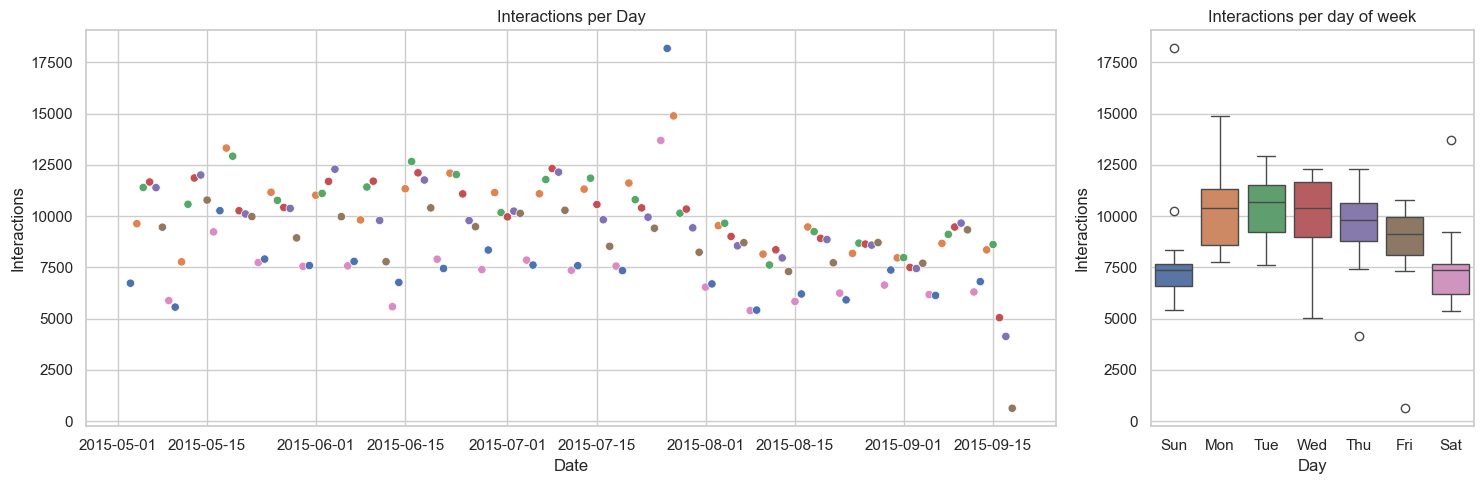

In [32]:
# how many events are there per day?
events_per_day = retailrocket.groupby([retailrocket['Time'].dt.date.rename('Date'), retailrocket['Time'].dt.day_name().rename('Day')]).size().reset_index(name='Interactions')

# abbreviate the day names for better readability
events_per_day['Day'] = events_per_day['Day'].map({'Monday': 'Mon', 'Tuesday': 'Tue', 'Wednesday': 'Wed', 'Thursday': 'Thu', 'Friday': 'Fri', 'Saturday': 'Sat', 'Sunday': 'Sun'})


fig, axes = plt.subplots(1, 2, 
                         width_ratios=[3, 1],
                         figsize=(15, 5)
                         )

# Scatterplot
sns.scatterplot(data=events_per_day,
                x='Date',
                y='Interactions',
                hue='Day',
                ax=axes[0])

# Set the title and labels for the scatterplot
axes[0].set_title('Interactions per Day')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Interactions')
# hide the legend
axes[0].get_legend().remove()

# Boxplot
sns.boxplot(data=events_per_day,
            x='Day',
            y='Interactions',
            hue='Day',
            ax=axes[1])

# Set the title and labels for the boxplot
axes[1].set_title('Interactions per day of week')
axes[1].set_xlabel('Day')
axes[1].set_ylabel('Interactions')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

The plot above shows that the number of interactions per day is relatively constant. Retailrocket has a lot of interactions during the week and less during the weekend. Mondays, Tuesdays and Wednesdays are the busiest days, while Saturdays and Sundays are the quietest.

How many cold start sessions are there in the dataset?  
Lets create a histogram with the frequency of the length of the sessions.

Text(4.110443266171792, 12000, 'Mean = 3.61')

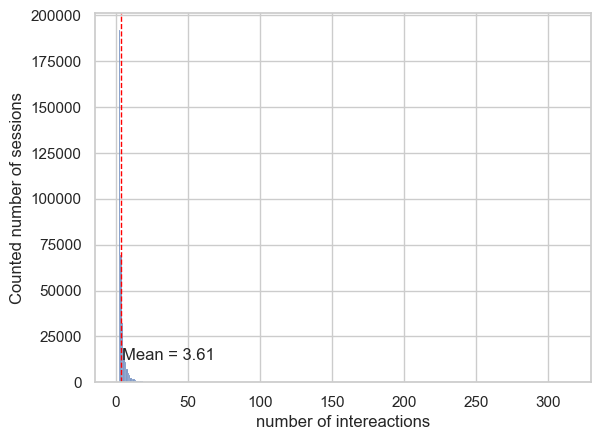

In [33]:
data_per_session = retailrocket.groupby('SessionId').size().reset_index(name='number of intereactions')

sns.histplot(data_per_session['number of intereactions'], binwidth=1)
plt.ylabel('Counted number of sessions')

# add a line for the mean
plt.axvline(data_per_session['number of intereactions'].mean(), color='red', linestyle='dashed', linewidth=1)
# print the mean
plt.text(data_per_session['number of intereactions'].mean() + 0.5, 12000, 'Mean = {:.2f}'.format(data_per_session['number of intereactions'].mean()))

On average, 1.996 interactions are made per session. This is a verry low number. Moreover, lookin at the distribution, there are a lot of sessions with only one interaction. This indicates that there are a lot of cold start sessions in the dataset. We can also zoom in on the distribution of the number of interactions per session and limit the x-axis to 25.

Text(4.110443266171792, 12000, 'Mean = 3.61')

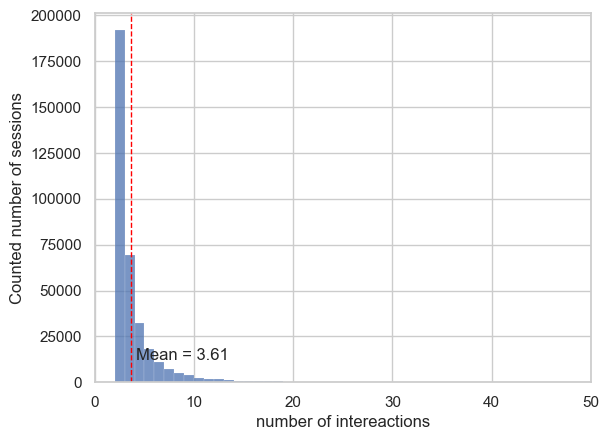

In [34]:
sns.histplot(data_per_session['number of intereactions'], binwidth=1)
plt.ylabel('Counted number of sessions')
# limit the x-axis to 25
plt.xlim(0, 50)

# add a line for the mean
plt.axvline(data_per_session['number of intereactions'].mean(), color='red', linestyle='dashed', linewidth=1)
# print the mean
plt.text(data_per_session['number of intereactions'].mean() + 0.5, 12000, 'Mean = {:.2f}'.format(data_per_session['number of intereactions'].mean()))

Now that we zoomed in by limiting the x axis to 50 interactions, we can see that the distribution is heavily right-skewed. The majority of the sessions have less than 10 interactions. This is a clear indication that there are a lot of cold start sessions in the dataset.  

Lets now focus on the items, and see how many interactions each item has. We can create a histogram with the frequency of the number of interactions per item.
Does one item dominate the dataset? Or are the interactions spread out over the items?

'top 10 most popular items:'

,ItemId,number of intereactions
78318,461686,1963
43678,257040,1270
37215,219512,1173
52588,309778,1145
65291,384302,1075
54273,320130,1005
1618,9877,983
39798,234255,878
32162,190000,832
20293,119736,824


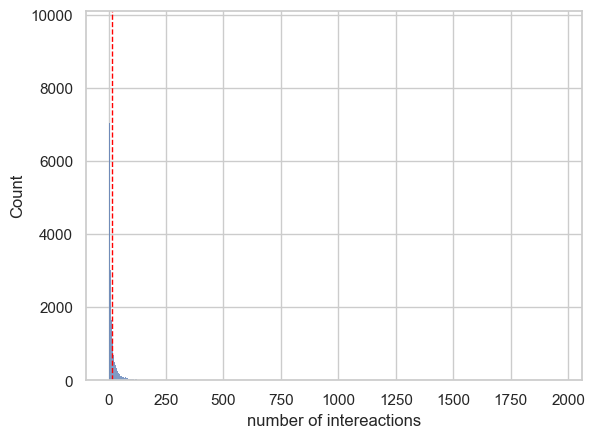

In [35]:
data_per_item = retailrocket.groupby('ItemId').size().reset_index(name='number of intereactions').sort_values('number of intereactions', ascending=False)
sns.histplot(data_per_item['number of intereactions'], binwidth=1)

# add a line for the mean
plt.axvline(data_per_item['number of intereactions'].mean(), color='red', linestyle='dashed', linewidth=1)

display('top 10 most popular items:')
display(data_per_item.head(10))

In the above histogram and top 10 table, we can see that some items are very popular and have been interacted with many times, while most items have been interacted with only a few times. This is a typical characteristic of e-commerce datasets. And the cold item start is visible in the histogram.

Lets zoom in on the distribution of the number of interactions per item and limit the x-axis to 100.

(0.0, 100.0)

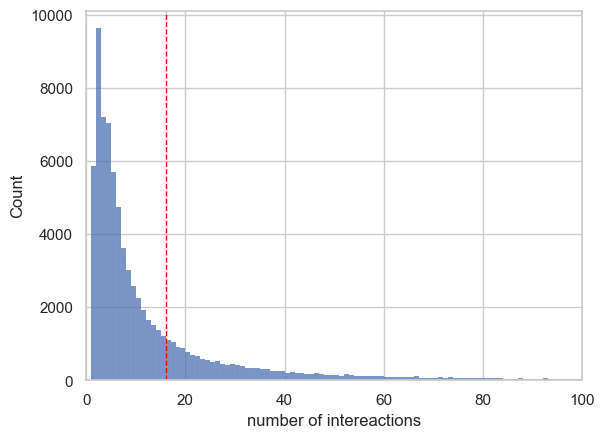

In [36]:
data_per_item = retailrocket.groupby('ItemId').size().reset_index(name='number of intereactions').sort_values('number of intereactions', ascending=False)
sns.histplot(data_per_item['number of intereactions'], binwidth=1)

# add a line for the mean
plt.axvline(data_per_item['number of intereactions'].mean(), color='red', linestyle='dashed', linewidth=1)


# limit the x-axis to 100
plt.xlim(0, 100)

This plot shows that the distribution of the number of interactions per item is heavily right-skewed. The majority of the items have less than 10 interactions. This is a clear indication that there are a lot of cold start items in the dataset.

Lets now analyse the time element, do items get to be interacted with more as time goes on? And how are the interactions distributed over time?

In [37]:
# create a dataframe where we track the first and last time an item was interacted with by taking the min and max of the Time column for each item. also count the number of interactions per item
data_per_item = retailrocket.groupby('ItemId').agg({'Time': ['min', 'max', 'count']}).reset_index()

# compute the time between the first and last interaction for each item
data_per_item['time between first and last interaction'] = data_per_item['Time']['max'] - data_per_item['Time']['min']
data_per_item


ItemId                    Time                                \
                                  min                     max count   
0           6 2015-05-06 20:33:13.122 2015-08-06 18:56:05.165    11   
1          15 2015-05-28 20:21:23.698 2015-07-16 15:50:43.336    15   
2          16 2015-05-12 02:12:50.266 2015-08-11 17:21:48.938    10   
3          19 2015-05-03 21:46:12.361 2015-09-07 04:24:42.334    11   
4          25 2015-05-12 16:43:15.963 2015-09-12 23:38:42.334    44   
...       ...                     ...                     ...   ...   
79172  466849 2015-07-13 15:31:07.216 2015-09-15 05:28:58.538     3   
79173  466858 2015-07-19 21:53:56.579 2015-08-11 02:51:08.108     2   
79174  466860 2015-06-16 13:53:00.757 2015-06-16 13:53:00.757     1   
79175  466861 2015-05-12 04:10:10.037 2015-09-17 13:40:29.684    66   
79176  466864 2015-05-04 00:03:57.562 2015-08-11 07:53:28.134    50   

      time between first and last interaction  
                                               
0                     91 days 22:22:52.043000  
1                     48 days 19:29:19.638000  
2                     91 days 15:08:58.672000  
3                    126 days 06:38:29.973000  
4                    123 days 06:55:26.371000  
...                                       ...  
79172                 63 days 13:57:51.322000  
79173                 22 days 04:57:11.529000  
79174                         0 days 00:00:00  
79175                128 days 09:30:19.647000  
79176                 99 days 07:49:30.572000  

[79177 rows x 5 columns]

<Axes: xlabel='time between first and last interaction', ylabel='Count'>

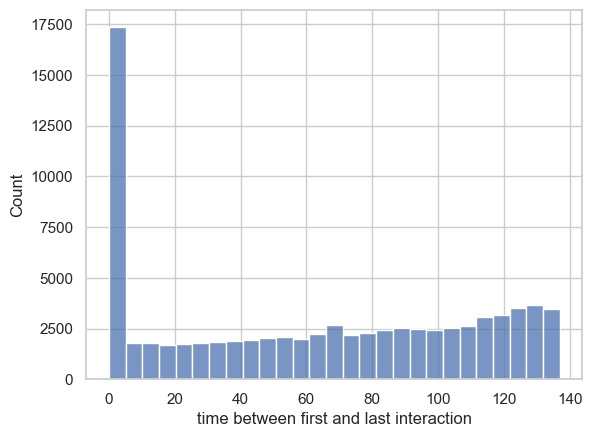

In [38]:
# create a boxplot of the distribution of the time between the first and last interaction for each item
sns.histplot(x=data_per_item['time between first and last interaction'].dt.days, binwidth=5) 

The above histogram shows that most of the products are interected with up to almost 140 days. Moreover, most of the products only have a few interactions, indicating that there are a lot of cold start items in the dataset. Interestingly, the number of interactions per product is relatively constant and only grows slightly as time goes on. This suggests that the popularity of the products is relatively constant over time as it does not increase significantly.

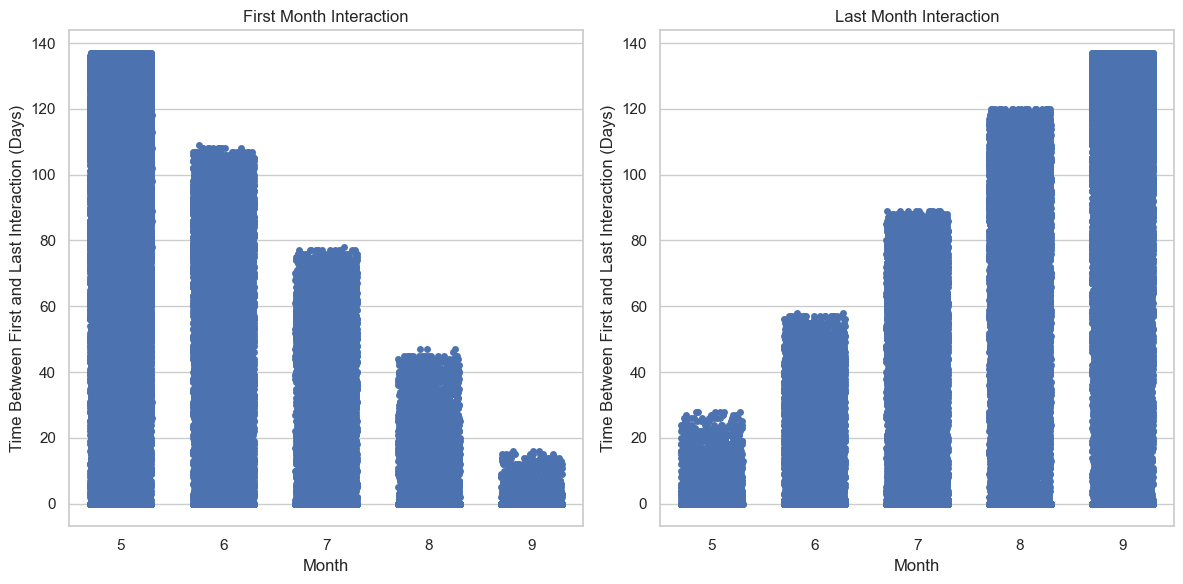

In [39]:
data_per_item['First month interaction'] = data_per_item['Time']['min'].dt.month
data_per_item['Last month interaction'] = data_per_item['Time']['max'].dt.month

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first strip plot on the first subplot
sns.stripplot(x=data_per_item['First month interaction'], 
              y=data_per_item['time between first and last interaction'].dt.days,
              jitter=0.3,
              ax=axes[0])

# Set the title and labels for the first subplot
axes[0].set_title('First Month Interaction')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Time Between First and Last Interaction (Days)')

# Plot the second strip plot on the second subplot
sns.stripplot(x=data_per_item['Last month interaction'], 
              y=data_per_item['time between first and last interaction'].dt.days,
              jitter=0.3,
              ax=axes[1])

# Set the title and labels for the second subplot
axes[1].set_title('Last Month Interaction')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Time Between First and Last Interaction (Days)')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

Please check the same visualisation in `0. preprocessing Diginetica & EDA.ipynb`. Both visualisations are completely opposite. It indicates that the Retailrocket dataset is a session-based dataset where random sessions have been sampled and not items from May and June (as in Diginetica). This is also the reason why the time between the first and last interaction of items does not change much as time incraeses.

This is also the reason why this plot above, has data points between 0 and 120 in May and Diginetica has only data points around 125.